## Clustering

### KMeans Clustering

In [1]:
from sklearn.cluster import KMeans

In [2]:
%matplotlib inline

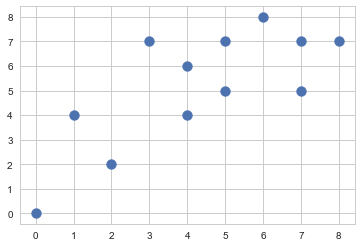

In [3]:
X = np.array([[7, 5], [5, 7], [7, 7], [4, 4], [4, 6], [1, 4],
              [0, 0], [2, 2], [8, 7], [6, 8], [5, 5], [3, 7]])
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

In [5]:
model1 = KMeans(n_clusters=2, init="random", n_init=1, max_iter=1, random_state=1).fit(X)

In [6]:
c0, c1 = model1.cluster_centers_
c0, c1

(array([6.6, 6.8]), array([2.71428571, 4.        ]))

In [7]:
model1.score(X)

-63.00408163265301

In [8]:
def plot_cluster(model, c0, c1):
    plt.scatter(X[model.labels_ == 0, 0],
                X[model.labels_ == 0, 1], s=100, marker='v', c='r')
    plt.scatter(X[model.labels_ == 1, 0],
                X[model.labels_ == 1, 1], s=100, marker='^', c='b')
    plt.scatter(c0[0], c0[1], s=200, c="r")
    plt.scatter(c1[0], c1[1], s=200, c="b")
    plt.show()

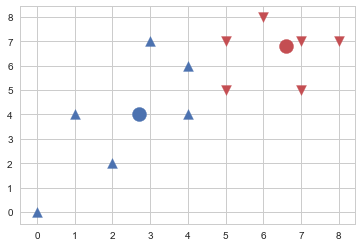

In [9]:
plot_cluster(model1, c0, c1)

In [10]:
def kmeans_df(model, c0, c1):
    df = pd.DataFrame(np.hstack([X,
                                 np.linalg.norm(X - c0, axis=1)[:, np.newaxis],
                                 np.linalg.norm(X - c1, axis=1)[:, np.newaxis],
                                 model.labels_[:, np.newaxis]]),
                      columns=["x0", "x1", "d0", "d1", "c"])
    return df

In [11]:
kmeans_df(model1, c0, c1)

,x0,x1,d0,d1,c
0,7.0,5.0,1.843909,4.400835,0.0
1,5.0,7.0,1.612452,3.771537,0.0
2,7.0,7.0,0.447214,5.231381,0.0
3,4.0,4.0,3.820995,1.285714,1.0
4,4.0,6.0,2.720294,2.377617,1.0
5,1.0,4.0,6.260990,1.714286,1.0
6,0.0,0.0,9.476286,4.833978,1.0
7,2.0,2.0,6.648308,2.123724,1.0
8,8.0,7.0,1.414214,6.077728,0.0
9,6.0,8.0,1.341641,5.176477,0.0


In [12]:
def calc_new_centroid(model):
    c0_new = (X[model.labels_ == 0, 0].mean(), X[model.labels_ == 0, 1].mean())
    c1_new = (X[model.labels_ == 1, 0].mean(), X[model.labels_ == 1, 1].mean())
    return c0_new, c1_new

In [13]:
calc_new_centroid(model1)

((6.333333333333333, 6.5), (2.3333333333333335, 3.8333333333333335))

In [14]:
model2 = KMeans(n_clusters=2, init="random", n_init=1,
               max_iter=2, random_state=1).fit(X)

In [15]:
c0, c1 = model2.cluster_centers_
c0, c1

(array([6.33333333, 6.5       ]), array([2.33333333, 3.83333333]))

In [16]:
model2.score(X)

-59.22222222222216

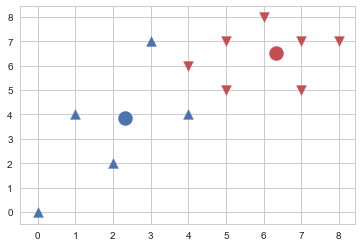

In [17]:
plot_cluster(model2, c0, c1)

In [18]:
kmeans_df(model2, c0, c1)

,x0,x1,d0,d1,c
0,7.0,5.0,1.641476,4.810290,0.0
1,5.0,7.0,1.424001,4.139914,0.0
2,7.0,7.0,0.833333,5.639641,0.0
3,4.0,4.0,3.419714,1.674979,1.0
4,4.0,6.0,2.386304,2.733537,0.0
5,1.0,4.0,5.890199,1.343710,1.0
6,0.0,0.0,9.075302,4.487637,1.0
7,2.0,2.0,6.247222,1.863390,1.0
8,8.0,7.0,1.740051,6.491447,0.0
9,6.0,8.0,1.536591,5.550275,0.0


In [19]:
calc_new_centroid(model2)

((6.0, 6.428571428571429), (2.0, 3.4))